In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


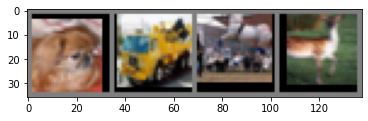

  dog truck horse  deer


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
from models.net import Net
net = Net().to(device)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)


In [5]:
# import os
save_path = './checkpoints/full_train.pth'
# if os.path.exists(save_path):
#     net.load_state_dict(torch.load(save_path))

In [6]:
import torch.optim as optim
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD (net.parameters (), lr = 0.05, momentum = 0.9, weight_decay = 5e-4)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25, 40], gamma=0.1) 

In [7]:
from utils import utils

utils.train(net, trainloader, optimizer, loss_function, scheduler, device, epochs=50, 
            testloader=testloader)

epoch: 1, training loss: 1.612779410598833
test accuracy 0.5408


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/claudiu/anaconda3/envs/cerberus/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/claudiu/

KeyboardInterrupt: 

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
torch.save(net.state_dict(), save_path)